<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 1: Classifiers</H2>



| <font style="font-size:larger;">Date set     | <font style="font-size:larger;">Hand-in date |
|:------------------|:-----------------------------------|
|<font style="font-size:larger;"> 24th January 2019 |<font style="font-size:larger;">**  12 noon, Wednesday 5th February 2020** |

</font>

Candidate number:  <font color="red">*660028124*</font>

Marking is anonymous, so please don't write your name or reveal your identity!


The module assessment is comprised of your IPython notebooks. There will be four marked assignments, of which this is the first. All assignments will be equally weighted and therefore worth 25% of your module mark. 


Your IPython notebook should show what you did, what was the
result, and what you can conclude from the exercise. For some reports you will need to comment on a paper you have read.   Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>



<div class="alert alert-info">
 Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
 </div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

## 1. Classification

In the first part of this workshop, we will work on a simple classification problem with synthetic data. The dataset has one binary target $t\in \{0,1\}$ and two features $\mathbf{x} = [x_1,x_2]$. This will allow to visualise the data and model decision boundary on 2D plots.

First, you should download and load the data in from two files on the VLE, the files should be placed in the same folder as the jupyter notebook. The files contain the $\mathbf{x}$ and $t$ values for 500 samples.

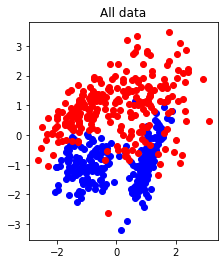

In [2]:
# we first load each file in a separate array
Xall = np.load('ecmm422_ca1_part1_X.npy')
tall = np.load('ecmm422_ca1_part1_t.npy')

# then we plot all data using matplotlib - note the indexing to select only samples from one class or the other
plt.plot(Xall[tall==0, 0], Xall[tall==0, 1], 'bo')
plt.plot(Xall[tall==1, 0], Xall[tall==1, 1], 'ro')
plt.axis('scaled')
plt.title('All data')
plt.show()

It is clear that it cannot be completely separated by a straight line, so these data are said not to be "linearly separable".

The first step in any machine learning work will be to separate and put aside a test set for final evaluation. Often this set will be sampled randomly from the available data, but for this workshop we will use a specific subset of half the data so that performance is comparable. 

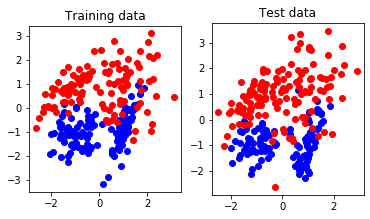

In [18]:
I = range(len(tall))    # you could change this for np.random.permutation(len(tall)) to get a random selection
                        # do not do this for this workshop as I want to be able to compare final performance. 

Itrain = I[:len(tall)//2]   # First half of indices for training
Itest = I[len(tall)//2:]    # Second half for test

Xtr = Xall[Itrain,:] # we define variables for the training set...
ttr = tall[Itrain]   

Xte = Xall[Itest,:]  # ... and for the test set
tte = tall[Itest] 
# then we plot both sets
plt.subplot(121)
plt.plot(Xtr[ttr==0, 0], Xtr[ttr==0, 1], 'bo')
plt.plot(Xtr[ttr==1, 0], Xtr[ttr==1, 1], 'ro')
plt.axis('scaled')
plt.title('Training data')

plt.subplot(122)
plt.plot(Xte[tte==0, 0], Xte[tte==0, 1], 'bo')
plt.plot(Xte[tte==1, 0], Xte[tte==1, 1], 'ro')
plt.axis('scaled')
plt.title('Test data')

# note that we would usually also label axes, but in this case the features 
# are unnamed so this would not add much information. 

plt.show()


Good. We can see in those plots that the two distributions are comparable, so we did not create a pathological split (eg, one that would contain only one class!) by accident. 

<b>NB:</b> We must <b>not</b> use the test data as part of the training process.

We will use three different algorithms in this workshop: k-NN, Neural Networks and decision trees. 

### 1.1 Classification with k-nearest neighbours
As a first step, we will try to model the dataset distribution using k-Nearest Neighbours. 
We will use the k-nearest neighbour classifier from scikit learn, which is  quite an extensive implementation of various machine learning algorithms.

In [4]:
from sklearn import neighbors

To start off, we use **all** the training data.

In [5]:
k = 5   # Choose the number of nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# we can get the performance on the training set
Str = knn.score(Xtr, ttr)

# we can also calculate the performance on the test set: 
Ste = knn.score(Xte, tte)

print('Performance with k=%i,\n\t- on training set %f \n\t- on test set %f' % (k, Str, Ste))


Performance with k=5,
	- on training set 0.952000 
	- on test set 0.916000


In the following cell, we will set up a grid of points to be classified over the whole domain and then classify them with the k-nn classifier, plotting the result in the corresponding place on the grid.  This gives a nice visualisation of the classfier's performance.


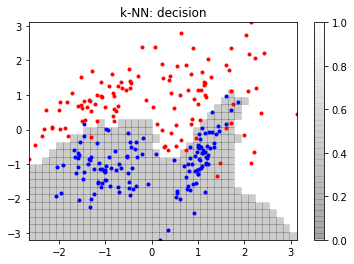

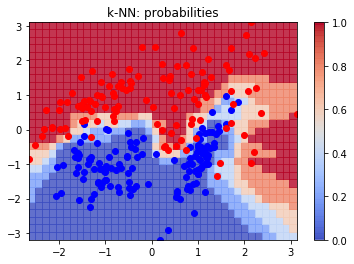

In [6]:
# we use this to calculate classification accuracy, you can as easily calculate it by hand though. 
from sklearn import metrics

def plot_decision_regions(X, t, model, label='model', show_decision=True, show_probabilities=True):
    '''
    For convenience, we will use this function to draw the decision boundaries and probabilities of the learnt 
    models. 
    Xtr: the features 
    ttr: the labels
    model: the trained model to display
    label: the name of the model (for figure captions)
    show_decision: draw decision boundary plot (default: true)
    show_probabilities: draw class probabilities (default: true)
    '''
    N, M = 40, 30   # Make these larger to get a smoother picture

    X1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), N)
    X2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), M)
    pred = np.zeros((M,N))
    prob = np.zeros((M,N,2))

    # Writing this double loop is not very efficient, but it is clear.
    for nx2, x2 in enumerate(X2):
        for nx1, x1 in enumerate(X1):
            pred[nx2, nx1] = model.predict([[x1, x2]])          # Predict expects a matrix of features
            if show_probabilities:
                prob[nx2, nx1, :] = model.predict_proba([[x1, x2]]) # Probabilities of belonging to one class
            

    if show_decision:
        plt.figure() 
        plt.pcolor(X1, X2, pred, cmap=plt.cm.gray, alpha=0.2)
        plt.colorbar()
        plt.plot(X[t==0,0], X[t==0,1], 'b.')
        plt.plot(X[t==1,0], X[t==1,1], 'r.')
        plt.axis('tight')
        plt.title('{}: decision'.format(label))

    if show_probabilities:
        # Plot the probabilites of belonging to the 1 class.
        plt.figure()
        plt.pcolor(X1, X2, prob[:,:,1], cmap=plt.cm.coolwarm, alpha=0.8)
        plt.colorbar()
        plt.plot(X[t==0,0], X[t==0,1], 'bo')
        plt.plot(X[t==1,0], X[t==1,1], 'ro')
        plt.axis('tight')
        plt.title('{}: probabilities'.format(label))
        
plot_decision_regions(Xtr, ttr, model=knn, label='k-NN')
plt.show()

Above we used all the training data and guessed the value of $k$. Much better is to estimate the optimum value of $k$, but dividing the training data into a training and a <b>validation</b> set; the generalisation error is then estimated on the validation set and the $k$ giving the minimum error is used for making predictions about unknown data.

Better than just dividing the training data into two is to use $k$ fold <b>cross validation</b> (don't confuse the $k$ in $k$ cross validation with the $k$ in $k$ nearest neighbours!)

The following cell shows how the sklearn routines may be used to produce training and validation sets automatically. More information at <http://scikit-learn.org/stable/modules/cross_validation.html>.  Don't worry about the deprecation warnings!

In [7]:
from sklearn.model_selection import KFold

# Make our 'training data' of 10 examples, each of two columns.
# These have just got integers in so that you can easily see which 
# examples have been selected.
X = np.vstack((np.arange(10), np.arange(10))).T + 10
t = np.arange(10)+100   # Targets
print("Features")
print(X)
print("Targets")
print(t)
print()
print()

kf = KFold(n_splits=5, shuffle=True)    # 5 fold CV here.

fold = 0
for train, validation in kf.split(X):
    print('-------- Fold', fold)
    print('Train')
    print(X[train])
    print(t[train])
    print('Test')
    print(X[validation])
    print(t[validation])
    fold += 1
    # Notice that each training set consists of 8 of the 10 examples 
    # and the validation set is the remaining 2.
    # You should train the model with X[train] and t[train]
    # and estimate the generalisation error on X[validation] and 
    # t[validation].  Don't forget to average the validation error 
    # over all the folds - you can also estimate the standard deviation 
    # to get error bars on the validation error!


Features
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
Targets
[100 101 102 103 104 105 106 107 108 109]


-------- Fold 0
Train
[[10 10]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [19 19]]
[100 102 103 104 105 106 107 109]
Test
[[11 11]
 [18 18]]
[101 108]
-------- Fold 1
Train
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [15 15]
 [16 16]
 [18 18]
 [19 19]]
[100 101 102 103 105 106 108 109]
Test
[[14 14]
 [17 17]]
[104 107]
-------- Fold 2
Train
[[11 11]
 [12 12]
 [13 13]
 [14 14]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[101 102 103 104 106 107 108 109]
Test
[[10 10]
 [15 15]]
[100 105]
-------- Fold 3
Train
[[10 10]
 [11 11]
 [12 12]
 [14 14]
 [15 15]
 [17 17]
 [18 18]
 [19 19]]
[100 101 102 104 105 107 108 109]
Test
[[13 13]
 [16 16]]
[103 106]
-------- Fold 4
Train
[[10 10]
 [11 11]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]]
[100 101 103 104 105 106 107 108]
Test
[[12 12]
 [19 19]]
[102 109]


### Question:

Make a plot of the training and validation errors as $k$ varies from 1 to, say, 50.  Here, just use the number of misclassified samples as the error, but you could also use the cross entropy (how do they differ?). 
<div style="text-align: right"><b>[10 marks]</b></div>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def knn_classification(folds,draw_graph=True):
    new_array= np.array(range(1,51))
    cover1 = []
    cover2 = []

    for k in range(1,51):
        kfg = KFold(n_splits=folds,shuffle=True,random_state=0)
        train_sum = 0
        validation_sum = 0
        for train,validation in kfg.split(Xtr):
            class_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
            class_knn.fit(Xtr[train],ttr[train])
            scores1 = class_knn.score(Xtr[train], ttr[train])
            scores2 = class_knn.score(Xtr[validation], ttr[validation])

            train_sum+=scores1
            validation_sum+=scores2

        cv_scores1 = train_sum/folds
        cv_scores2 = validation_sum/folds
        cover1.append(1-cv_scores1)
        cover2.append(1-cv_scores2)


    #     plot_decision_regions(X=Xtr, t=ttr, model=knn, label="KNN", show_decision=True, show_probabilities=False) ???

    best_k_index = cover2.index(min(cover2))
    best_k = new_array[best_k_index]
    
    if draw_graph:
        plt.plot(new_array,cover1,"y.-",label='Training data')
        plt.plot(new_array,cover2,"r.-",label='Validation data')

        plt.legend(loc='lower right')
        plt.xlabel('Number of Neighbors K')
        plt.ylabel('Error')

    
    return train,validation,best_k

Cross entropy assumes that all misclassification costs are of equal importance.

### Question:
1.  What is the best value of $k$?  
*  What is the error on the **test** set with the best $k$?
*  Make a plot of the decision regions (as above) with the best $k$
*  What can you say about the performance of the classifier when $k$ is too large or too small?
*  How do you think the optimum $k$ will vary if the amount of training data available is larger or smaller than 250 points?  Can you test your hypothesis?
<div style="text-align: right"><b>[10 marks]</b></div>

Performance: 
	- The best value of k is 5  
	- there are 10 number of folds.


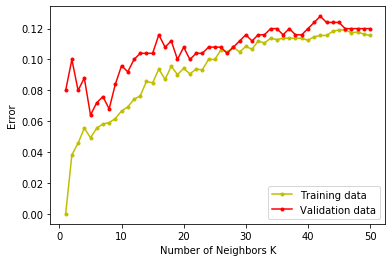

In [9]:
# Question 1:
f = 10
_,_,best_k = knn_classification(f,True)

print('Performance: \n\t- The best value of k is %d  \n\t- there are %d number of folds.' % (best_k,f))

plt.show()

In [10]:
# Question 2:
train,_,k = knn_classification(f,False)
class_knn2 = neighbors.KNeighborsClassifier(n_neighbors= k)
class_knn2.fit(Xtr[train],ttr[train])
test_score = class_knn2.score(Xte,tte)
ab = 1-test_score
print("Performance: \n\t- the error on the test set with the best k %f"%(ab))

Performance: 
	- the error on the test set with the best k 0.088000


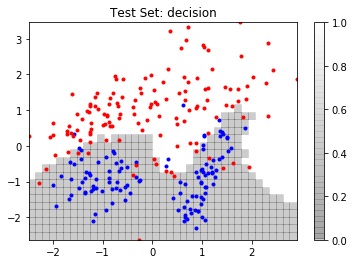

In [11]:
# Question 3:
plot_decision_regions(X=Xte, t=tte, model=class_knn2, label='Test Set', show_decision=True, show_probabilities=False)
plt.show()

##### Question 4:
When $k$ is too large it is underfitting whereas when $k$ is too small it is overfitting.

In [12]:
# Question 5:
odd_indices = [x for x in range(1,150) if x % 2 != 0]
t_Xtr = Xtr
t_ttr = ttr

Xtr = Xtr[odd_indices]
ttr = ttr[odd_indices]


_,_,best_lower = knn_classification(f,False)
print("Test 1: \n\t- The optimum k is %d \n\t- the amount of training data available is %d points."%(best_lower,len(Xtr)))
Xtr = Xall
ttr = tall
_,_,best_higher = knn_classification(f,False)

print("Test 2: \n\t- The optimum k is %d \n\t- the amount of training data available is %d points."%(best_higher,len(Xtr)))
Xtr = t_Xtr
ttr = t_ttr

Test 1: 
	- The optimum k is 1 
	- the amount of training data available is 75 points.
Test 2: 
	- The optimum k is 9 
	- the amount of training data available is 500 points.


### 1.2 Multi-layer perceptrons (MLP)

Multi-layer perceptrons are the sorts of neural networks that have been described in lectures.  In this section we'll use an MLP with weight decay regularisation to classify the same data again. 

The next cell sets up an MLP with 5 hidden units and the given regularisation constant ($\alpha$), trains it a few times from random starting places to find the best minimum (because $E(\mathbf{w})$ may have local minima) and uses it to classify points on a grid as above.

### Question:
Experiment with different values of the regularisation constant, plotting the decision boundaries to visualise how the regularisation forces a smooth or more wiggly boundary.  Remember to vary $\alpha$ on a logarithmic scale and it could range between $10^{-16}$ (effectively 0) and $1$. 

<div style="text-align: right"><b>[5 marks]</b></div>

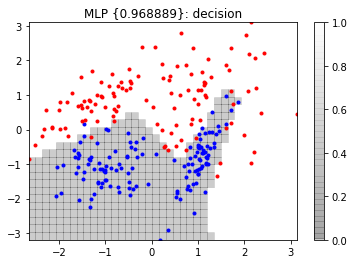

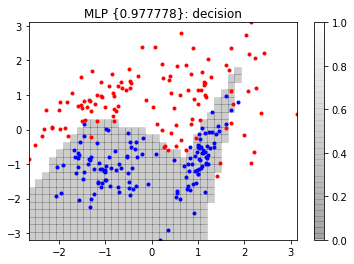

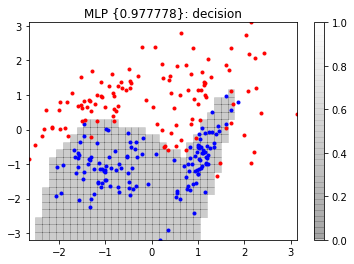

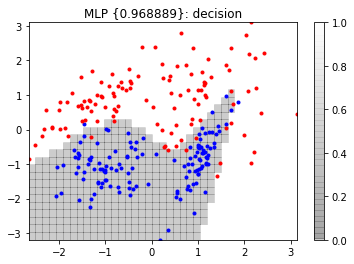

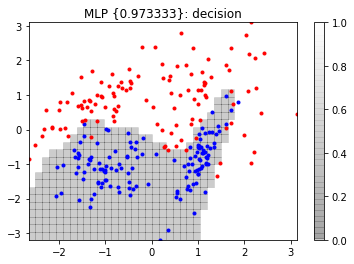

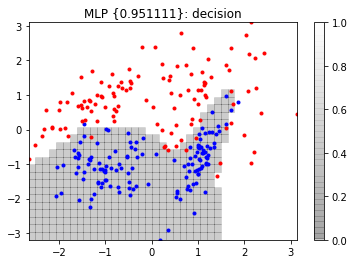

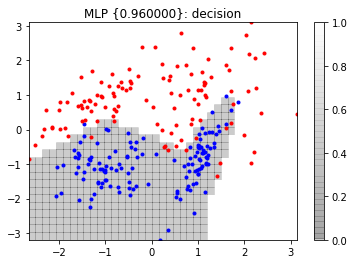

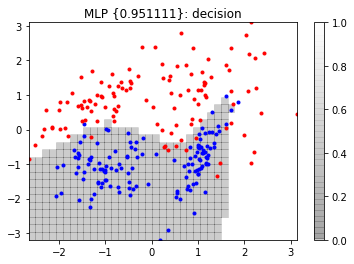

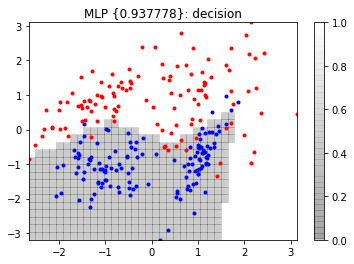

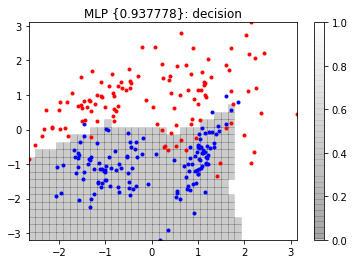

In [19]:
# load the Multi-Layer Perceptron class from Scikit-Learn
from sklearn.neural_network import MLPClassifier
def mlp_classifier(folds,num_of_training,trials,draw_graph=True):
    errors1 = []
    errors2 = []
    alphas =[]
    for g in ((np.logspace(1e-16,1.0,trials)-1)/10):

        kayf = KFold(n_splits=folds,shuffle=True, random_state=0)
        training_sum = 0
        vaild_sum = 0
        Ebest = np.Inf
        alphas.append(g)
        for t,v in kayf.split(Xtr):
            for n in range(num_of_training): # because initialisation is random, we train 10 times and take the best model (according to *training* error)
                mlp = MLPClassifier(solver='lbfgs', alpha=g, hidden_layer_sizes=(5,))
                mlp.fit(Xtr[t], ttr[t])
                if mlp.loss_ < Ebest:
                    mlpbest = mlp
                    Ebest = mlp.loss_
            mlp = mlpbest


            s1 = mlp.score(Xtr[t],ttr[t])
            s2 = mlp.score(Xtr[v],ttr[v])

            training_sum+=s1
            vaild_sum+=s2
            

        cvs1 = training_sum/folds
        cvs2 = vaild_sum/folds

        errors1.append(1-cvs1)
        errors2.append(1-cvs2)
        if draw_graph:
            plot_decision_regions(Xtr, ttr, model=mlp, label="MLP {%f}"%(s1)
                              , show_decision=True, show_probabilities=False)

    best_alpha_index = min(enumerate(errors2),key=lambda y:y[1])[0]
    best_alpha = alphas[best_alpha_index]
    
    
    return errors1,errors2,alphas,t,v,mlp,best_alpha


folds = 10
num_of_training = 10
trials = 10

result1,result2,alphas,train,valid,mlp2,best_alpha = mlp_classifier(folds,num_of_training,trials,True)

plt.show()


### Question:
Use cross-validation to choose the best value of the regularisation constant for these data.   Plot the training and validation data errors versus $\alpha$.  How well does the validation error correspond to the actual test error?

<div style="text-align: right"><b>[5 marks]</b></div>

Performance: 
	- The best value of alpha value for the validation data is 0.029155   
	- there are 10 number of training.


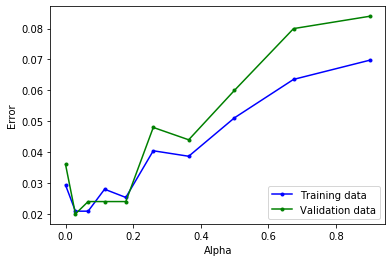

In [20]:
print('Performance: \n\t- The best value of alpha value for the validation data is %f   \n\t- there are %d number of training.' % (best_alpha,num_of_training))

plt.plot(alphas,result1,"b.-",label='Training data')
plt.plot(alphas,result2,"g.-",label='Validation data')
plt.legend(loc='lower right')
plt.xlabel('Alpha')
plt.ylabel('Error')

plt.show()

### Question:
Bonus question:  How should the best value of $\alpha$ vary as the number of training examples is increased? Why? Can you test it? 

<div style="text-align: right"><b>[5 marks]</b></div>

In [21]:
print('Test 1: \n\t- The best value of alpha value for the validation data is %f  \n\t- the number of training examples is %d.' % (best_alpha,len(Xtr)))

odd_indices = [x for x in range(1,150) if x % 2 != 0]

t_Xtr = Xtr
t_ttr = ttr

# # Xtr = Xtr[odd_indices]
# # ttr = ttr[odd_indices]

# _,_,_,_,_,_,best_lower = mlp_classifier(folds,num_of_training,trials,False)
# print("The best value of alpha is %f when the number of training examples is %d "%(best_lower,len(Xtr)))

Xtr = Xall
ttr = tall
_,_,_,_,_,_,best_higher = mlp_classifier(folds,num_of_training,trials,False)
print('Test 2: \n\t- The best value of alpha value for the validation data is %f  \n\t- the number of training examples is %d.' % (best_higher,len(Xtr)))


Xtr = t_Xtr
ttr = t_ttr

Test 1: 
	- The best value of alpha value for the validation data is 0.029155  
	- the number of training examples is 250.
Test 2: 
	- The best value of alpha value for the validation data is 0.259381  
	- the number of training examples is 500.


The best value of $\alpha$ does not have a correlation relationship to the number of training examples because the best alpha changes and is not fixed regardless  of the size of training example.

### 1.3. Support Vector Machines (SVM)

Support vector machines (SVMs) are popular and powerful classifiers.  We'll deal with them in detail later in the module.  In the following you will use SVMs with both a "linear kernel" and with a RBF kernel.  With a linear kernel the SVM can only separate the classes with a straight line or a (hyper)plane, but an RBF kernel is nonlinear and allows the SVM to generate curved decision boundaries.  


We'll use the support vector machines in scikit learn.  Here's an example of training a SVM using a linear kernel (i.e., no non-linearity).

Performance:
	- on training set 0.904000 
	- on test set 0.880000


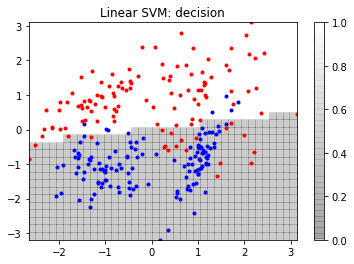

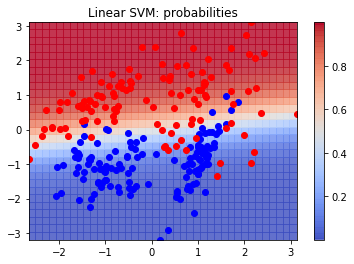

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)    # SVM with a linear kernel, 
                                                # note that enabling probabilities is slower
svm.fit(Xtr, ttr)                     # Train it on the training data

plot_decision_regions(X=Xtr, t=ttr, model=svm, label='Linear SVM', show_decision=True, show_probabilities=True)

Ste = svm.score(Xte, tte)
Str = svm.score(Xtr, ttr)
print('Performance:\n\t- on training set %f \n\t- on test set %f' % (Str, Ste))
plt.show()

Now use the SVM with <code>kernel='rbf'</code> to classify the data, but with a non-linear mapping so that the decision boundary can be non-linear. 

In this case the SVM has two additional parameters $C > 0$ and $\gamma$.  $C$ is a regularisation constant that controls how strongly points that lie on the wrong side of the decision boundary are penalised.  When $C$ is large, they are heavily penalised which results in the boundary being flexible, but when it is small they are lightly penalised so the boundary tends to be straighter.  You can set the value of $C$ (and $\gamma$) with

        svm = SVC(kernel='rbf', C=1, gamma=0.1) 

The default value of $C$ is 1 and the default value of $\gamma$ is 0.1.

### Question:
The $\gamma$ parameter controls the width of the RBF kernel, that is how close training samples must be to interact with each other.  When $\gamma$ is large the training samples must be close to interact and the decision boundary tends to be nonlinear, whereas when $\gamma$ is small it tends to be smooth.

Use cross validation on the *training* data to choose the best value of $C$ and $\gamma$.  Try a few values of $C$ and $\gamma$ by hand first of all to find appropriate ranges and it will  be best to vary them on a logrithmic scale.  You may care to investigate and use the sklearn helper functions for searching a grid of values for the best cross validation value: see <http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#example-svm-plot-rbf-parameters-py> or write your own!

What is the resulting accuracy on the test data and the best decision boundary?

<div style="text-align: right"><b>[15 marks]</b></div>

C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Tda-d\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

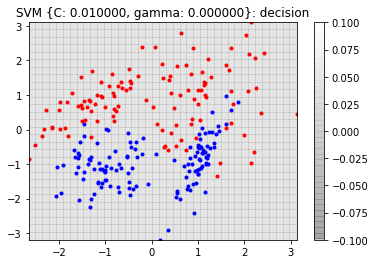

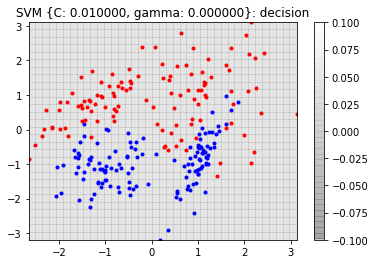

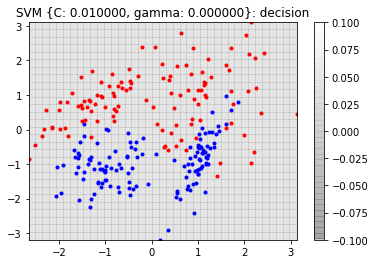

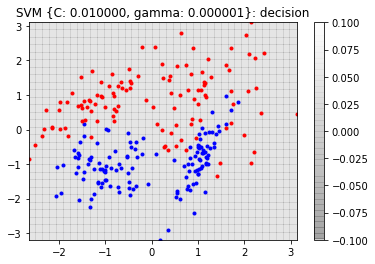

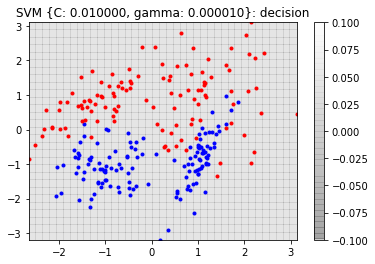

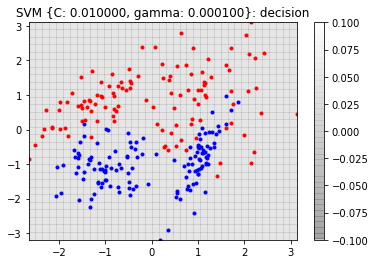

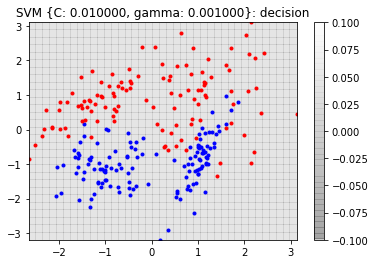

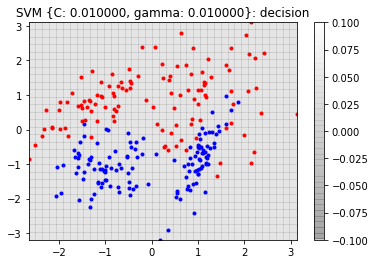

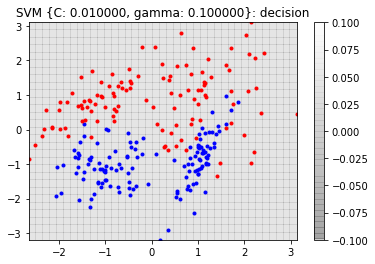

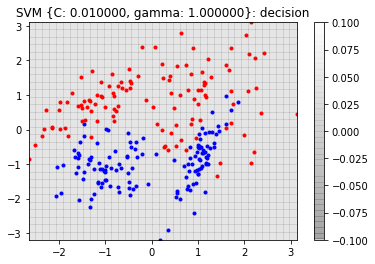

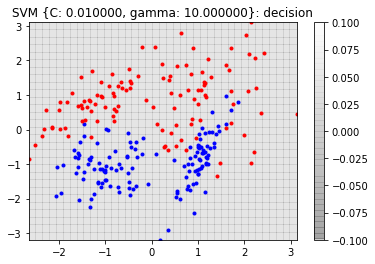

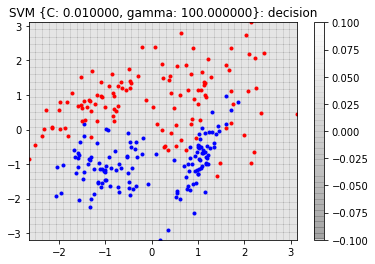

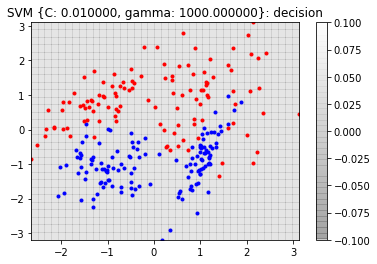

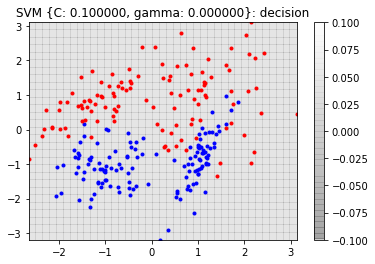

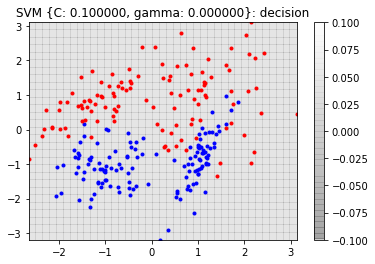

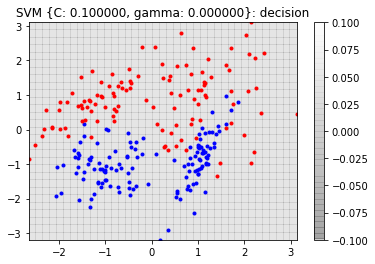

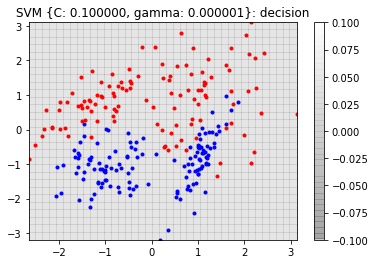

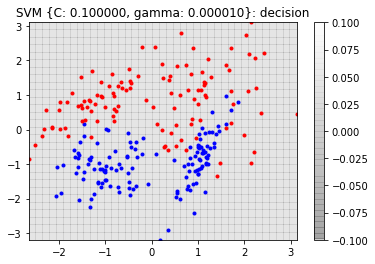

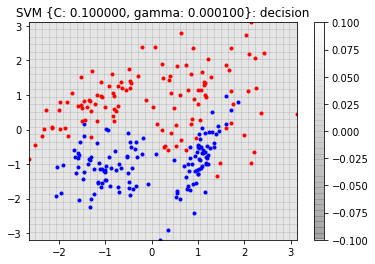

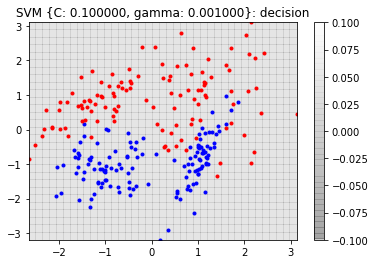

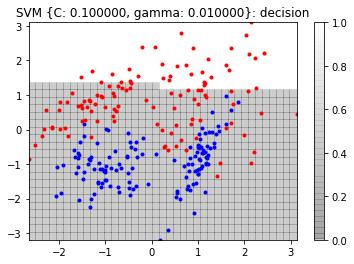

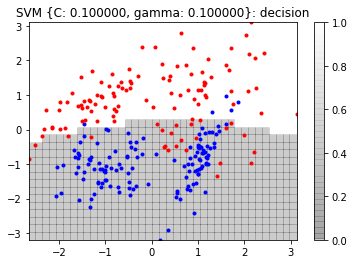

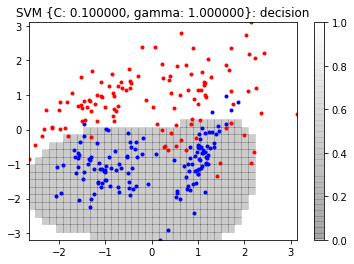

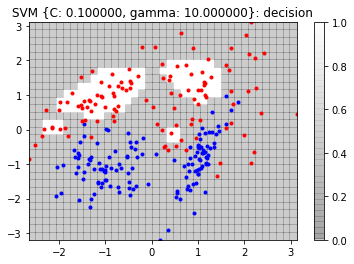

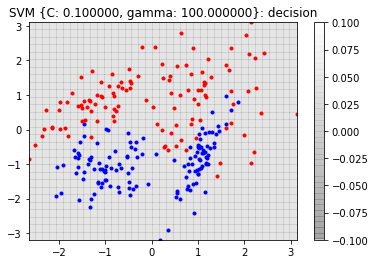

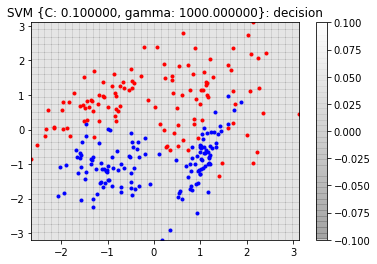

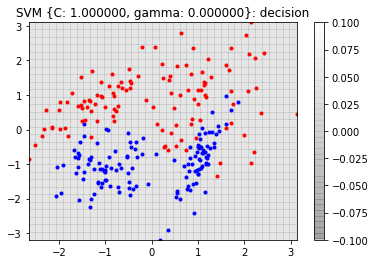

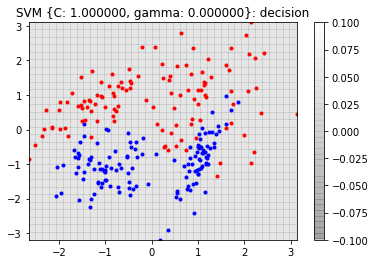

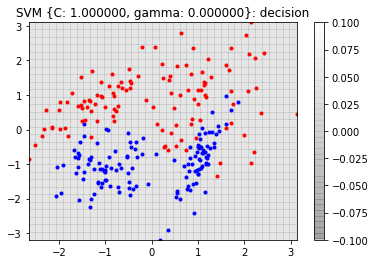

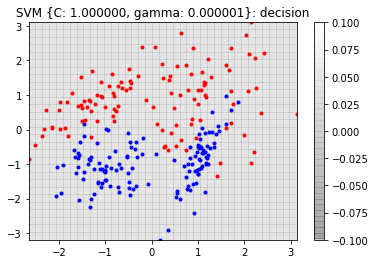

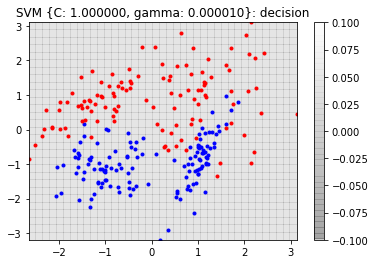

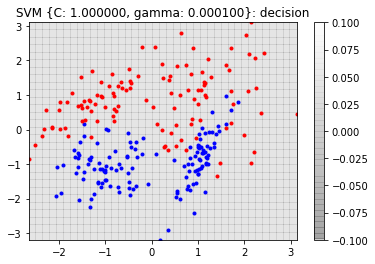

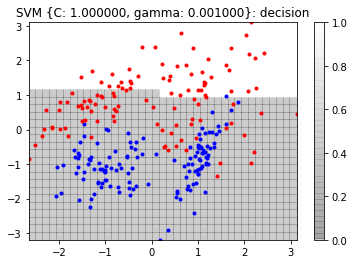

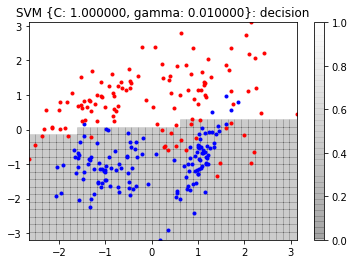

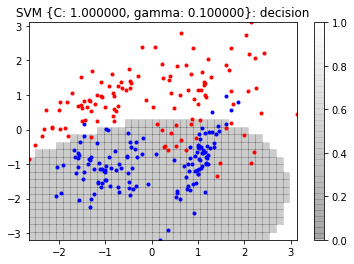

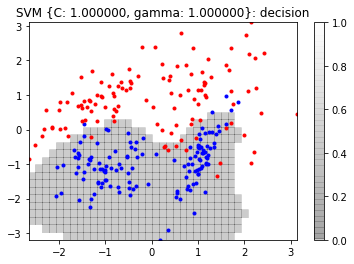

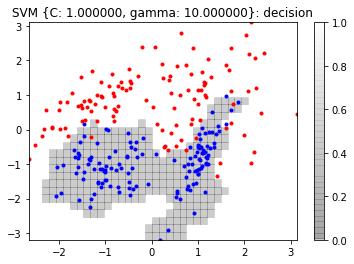

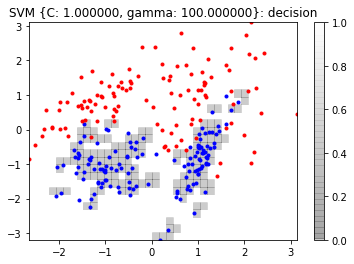

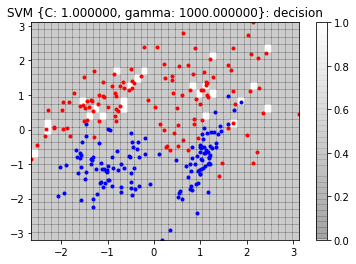

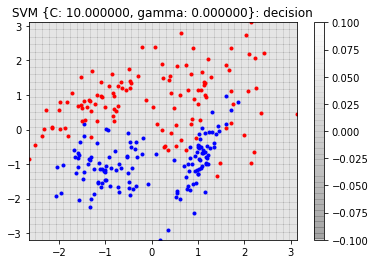

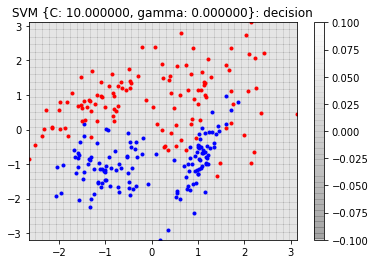

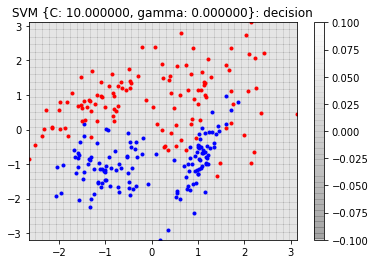

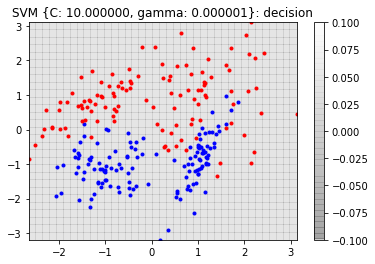

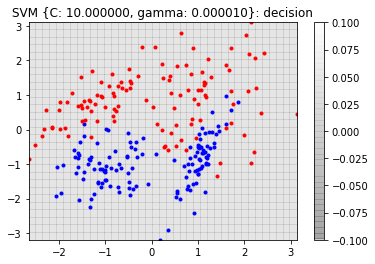

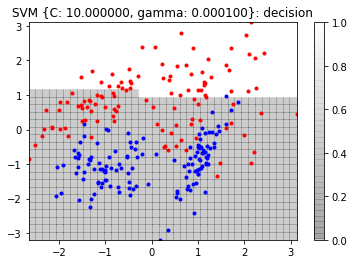

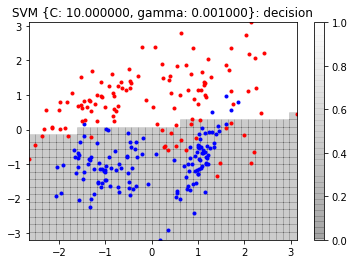

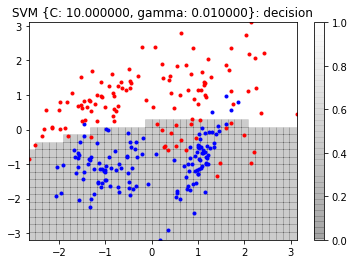

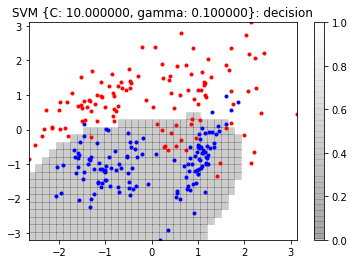

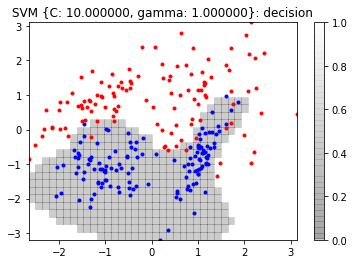

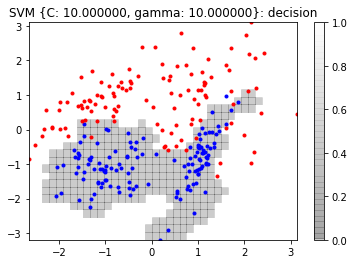

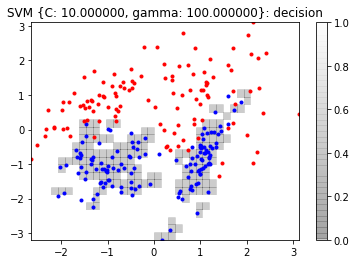

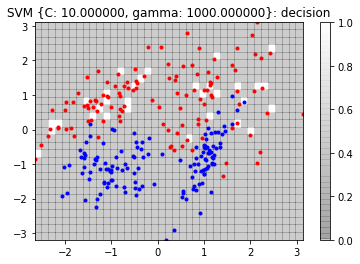

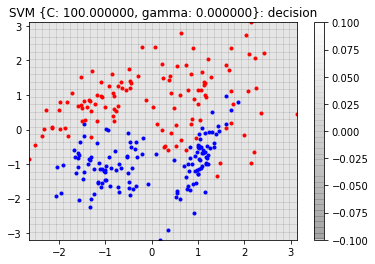

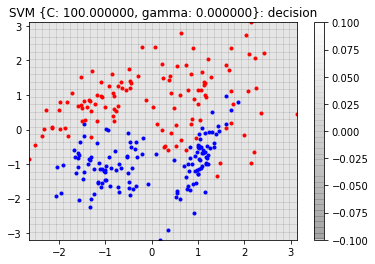

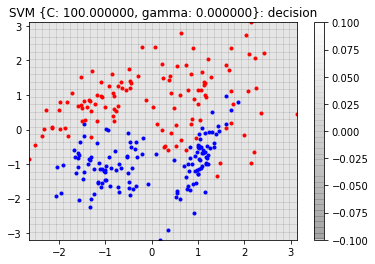

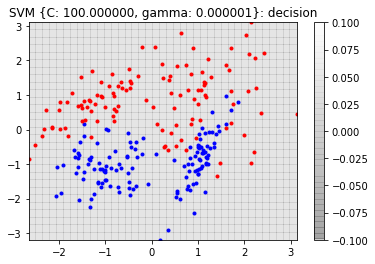

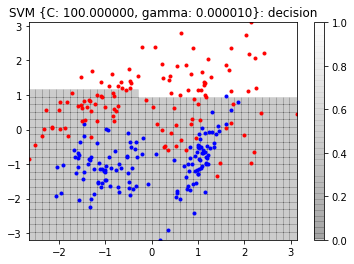

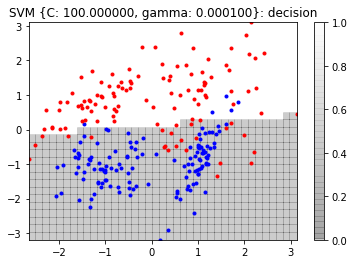

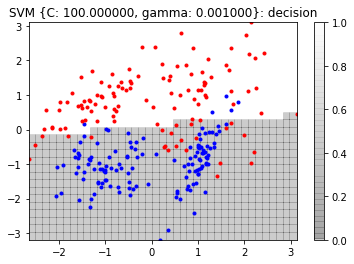

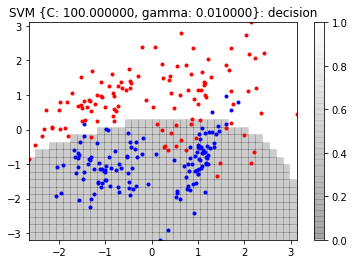

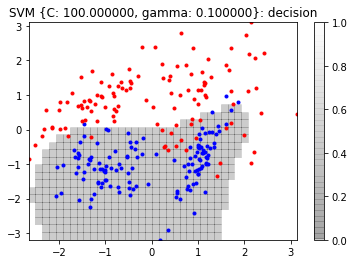

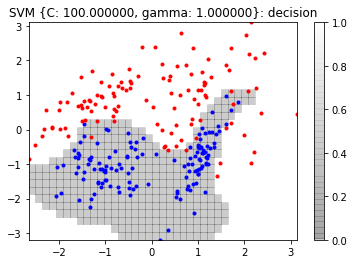

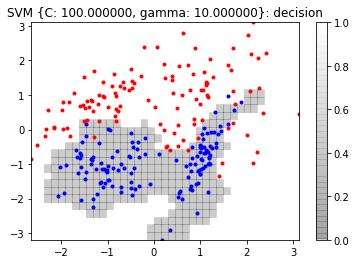

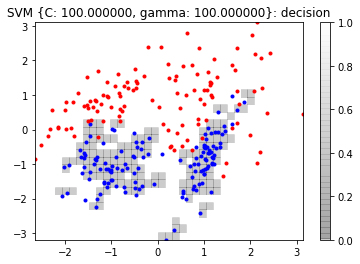

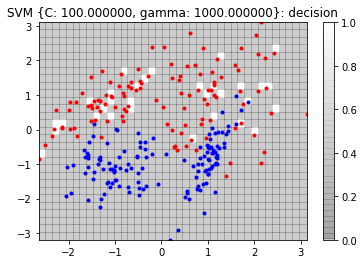

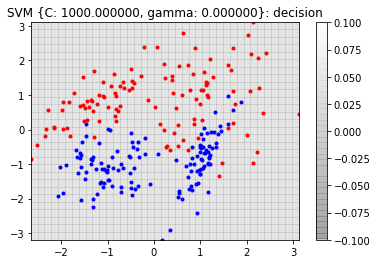

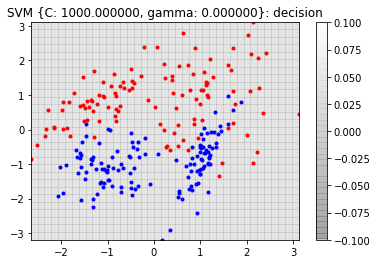

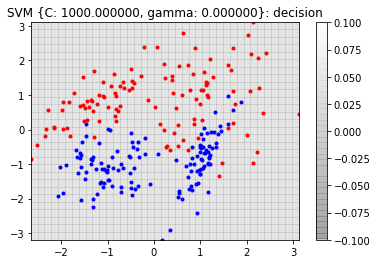

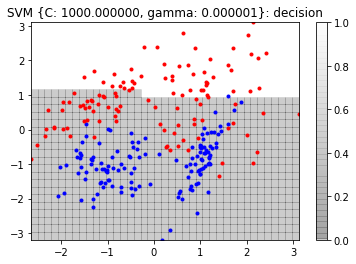

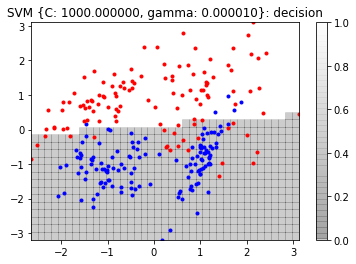

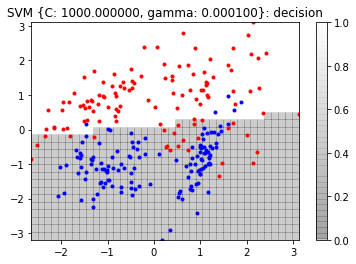

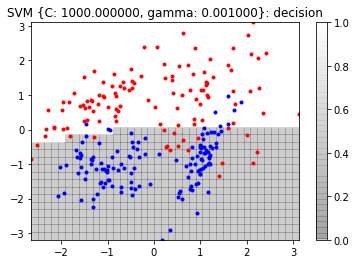

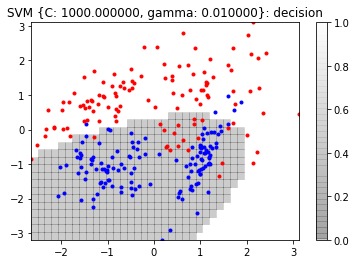

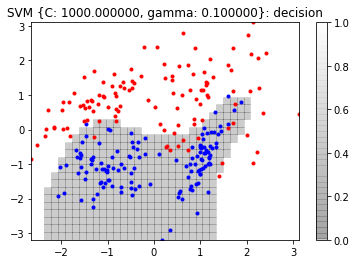

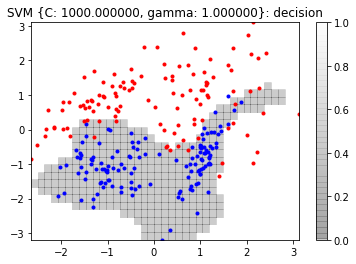

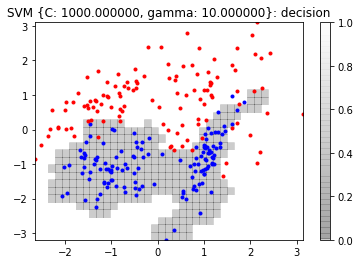

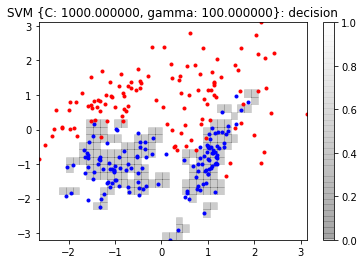

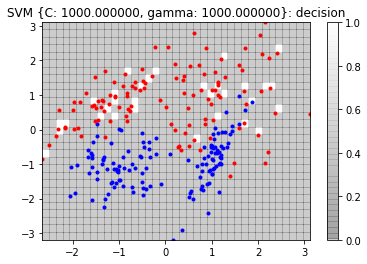

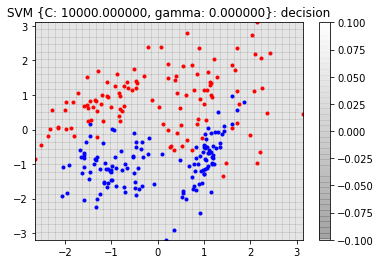

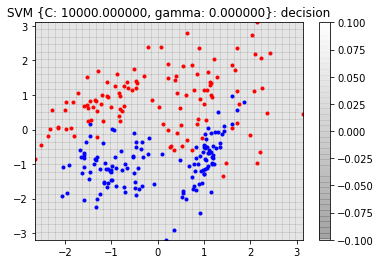

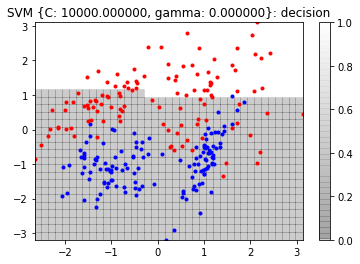

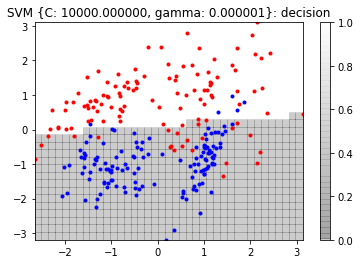

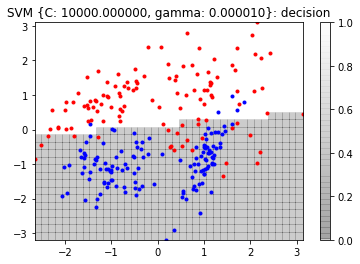

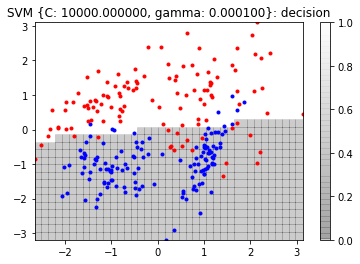

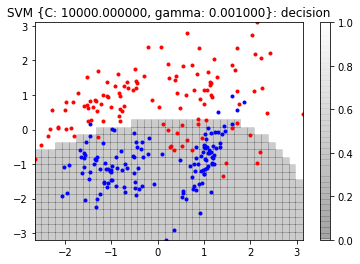

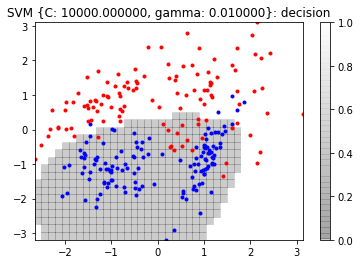

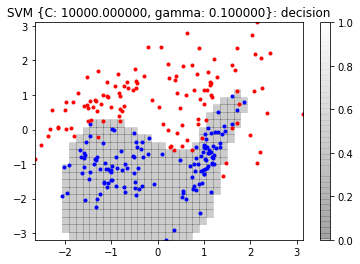

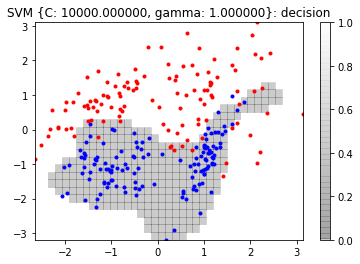

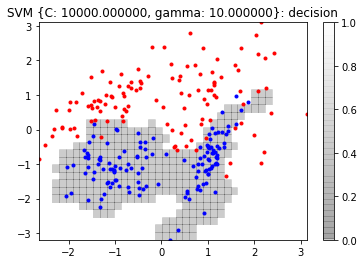

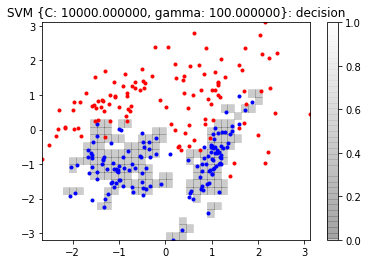

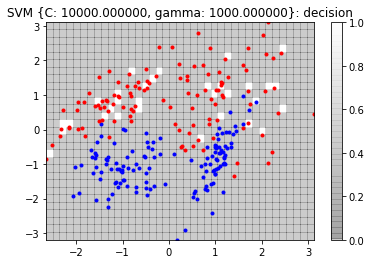

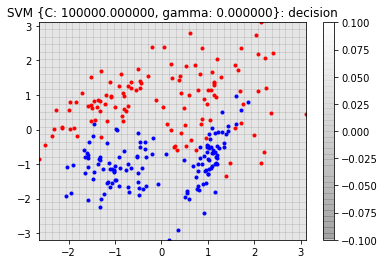

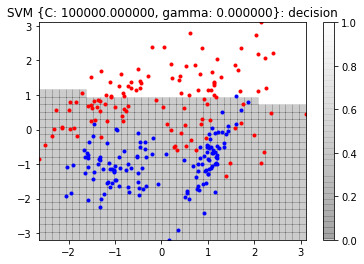

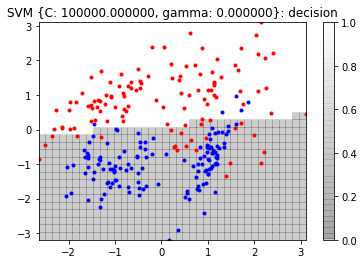

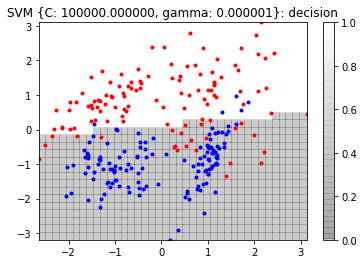

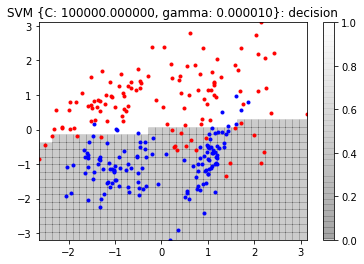

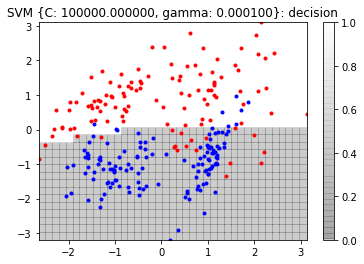

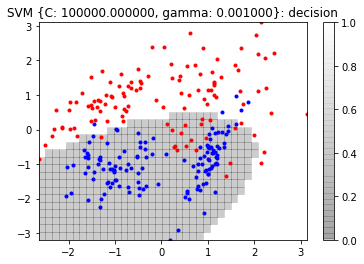

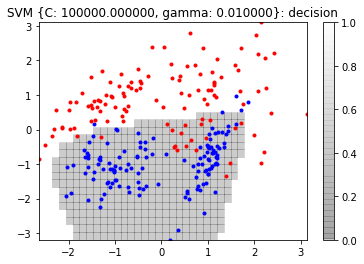

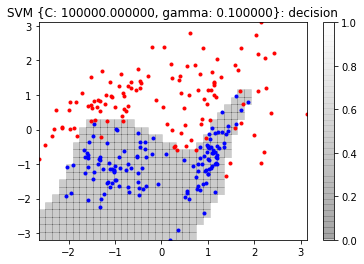

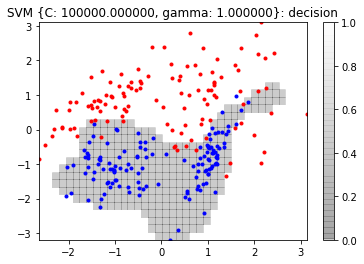

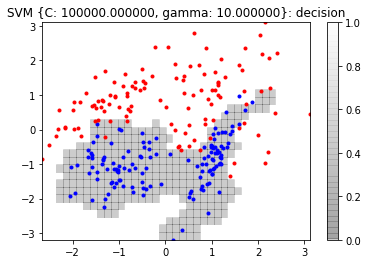

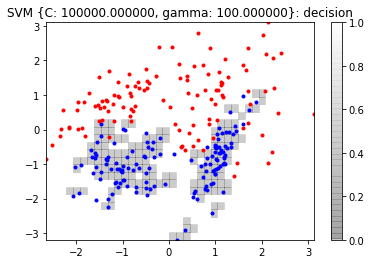

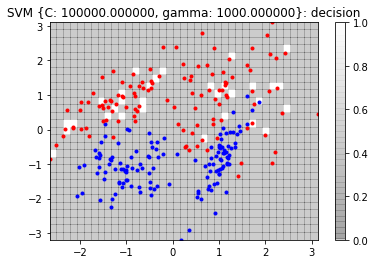

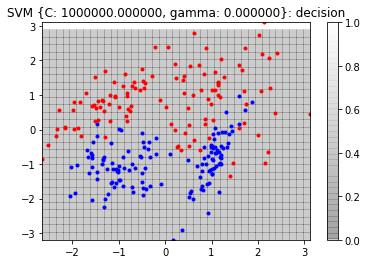

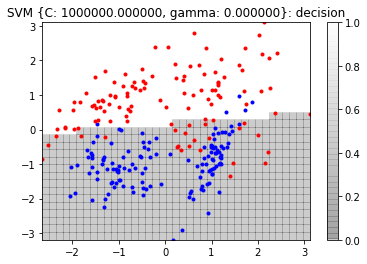

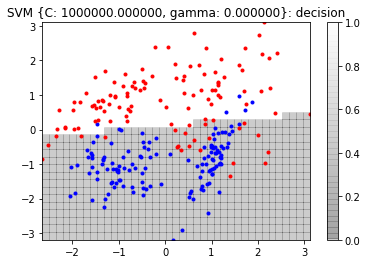

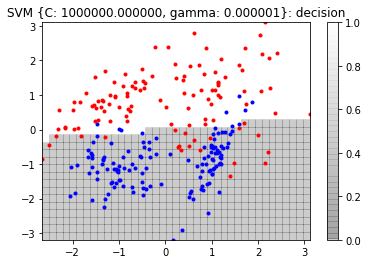

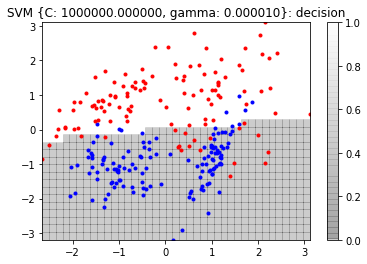

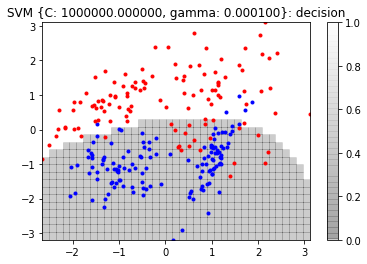

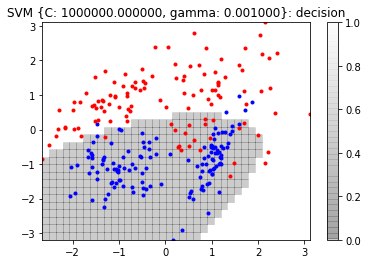

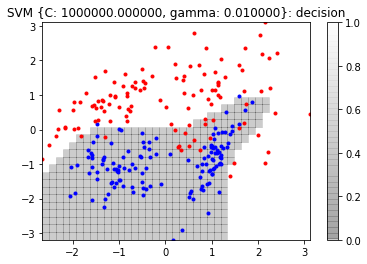

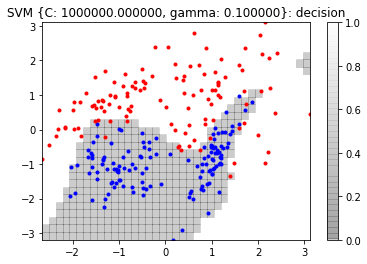

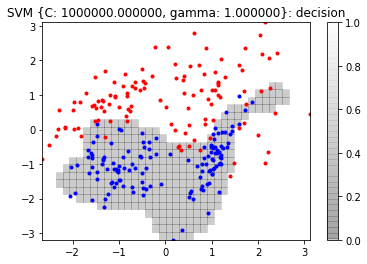

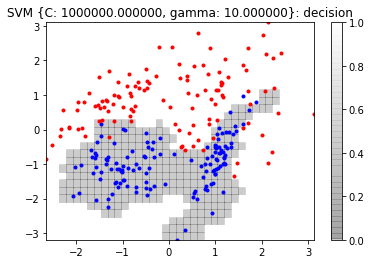

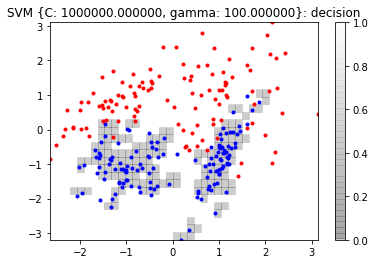

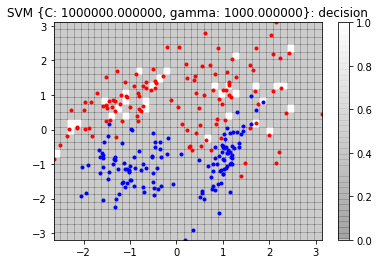

In [23]:
C_range = np.logspace(-2, 6, 9)
gamma_range = np.logspace(-9,3 , 13)

trials = 4
output1 = []
output2 = []
folds = 5
# classifiers = []
for C in C_range:
    for gamma in gamma_range:
        kf_svm = KFold(n_splits=folds,shuffle=True,random_state=1)
        
        svm_train_sum = 0
        svm_validation_sum = 0
        for training,validation2 in kf_svm.split(Xtr):
            svm = SVC(kernel='rbf', C=C, gamma=gamma, probability=True)            # SVM with a RBF kernel
            svm.fit(Xtr[training], ttr[training])
           
            
            scores_svm1 = svm.score(Xtr[training], ttr[training])
            scores_svm2 = svm.score(Xtr[validation2], ttr[validation2])

            svm_train_sum+=scores_svm1
            svm_validation_sum+=scores_svm2

        cv_svm_scores1 = svm_train_sum/folds
        cv_svm_scores2 = svm_validation_sum/folds

        output1.append(cv_svm_scores1)
        output2.append(cv_svm_scores2)
        plot_decision_regions(Xtr, ttr, model=svm, label="SVM {C: %f, gamma: %f}"%(C,gamma)
                              , show_decision=True, show_probabilities=False)
plt.show()

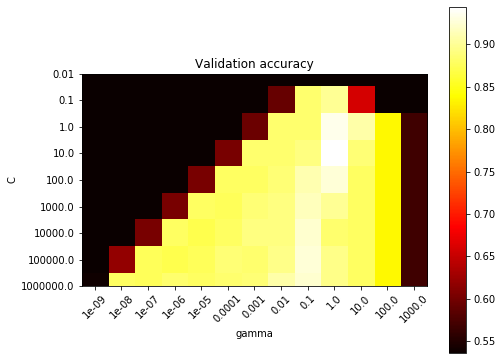

In [24]:
# plus_list = output1+output2
# print(plus_list)
new_one = np.reshape(output2,(len(C_range),len(gamma_range)))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(new_one, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()        

In [25]:
best_score = max(enumerate(output2),key=lambda y:y[1])[1]
result_x = np.where(new_one == np.amax(new_one))[0][0]
result_y = np.where(new_one == np.amax(new_one))[1][0]

print("The best parameters are {C:%f, Gamma:%f} with a score of %0.3f"
      % ( C_range[result_x],gamma_range[result_y],best_score))

The best parameters are {C:10.000000, Gamma:1.000000} with a score of 0.944


The $C$ and $\gamma$ for the some of the outstanding decision boundaries are: 
* $C$ = 10.0 and $\gamma$ = 10.0
* $C$ = 10.0 and $\gamma$ = 1.0
* $C$ = 1.0 and $\gamma$ = 10.0

The overall best $C$ and $\gamma$ for both the decision boundary and the validation accuracy is  $C$ = 10.0 and $\gamma$ = 1.0

## Part 2: Digits dataset

In the second part, we will experiment with the same algorithm on a more complex dataset: examples images of hand-written digits. For this we will use a standard dataset provided by sklearn: <i>digits</i>

In [2]:
from sklearn import datasets

# (note: we overwrite the previous data here, make sure to reload it if you go back to part 1)
Xall, tall = datasets.load_digits(return_X_y=True)

print(Xall.shape)
print(Xall)

print(np.unique(tall))

# print some examples of data from the dataset
for j in range(10):
    plt.subplot(2,5,j+1)
    plt.imshow(np.reshape(Xall[j,:], (8,8)), cmap=plt.cm.gray_r)
    plt.title("%d" % tall[j])
    
plt.show()

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


NameError: name 'np' is not defined

As you can see there are 1797 images arranged as 64-dimensional vectors, and defining 10 classes. In this case, the observed variables have many more dimensions, but we can use <i>multidimensional scaling</i> to visualise the distribution of the classes somehow (note that MDS on a large dataset can take a while).  

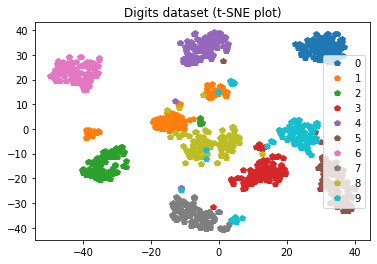

In [54]:
from sklearn.manifold import TSNE

# we select a subset of samples for speed 
Ntrain=1000
# print(Xall.shape[0])
J = np.random.permutation(Xall.shape[0])[:Ntrain] # How to make a list of length Ntrain where the values are permutation of 1797(Xall)
# print(len(J))
X = Xall[J,:]
t = tall[J]   # Features
# print(X.shape)
# print(t.shape)


# we then optimise the multidimensional scaling 
tsne = TSNE()
Xe = tsne.fit_transform(X)


# we then draw the classes on a 2D plot
for i in range(10):
    plt.plot(Xe[t==i,0], Xe[t==i,1], 'p', label='{}'.format(i))
plt.legend(loc='right')
plt.title('Digits dataset (t-SNE plot)')
plt.show()

This means that you have problem of <b>multiclass</b> classification. Some algorithms such as k-NN or MLPs can handle multiclass, whereas some other such as SVM need some additional work. 

In [55]:
#Example with k-NN:  

I = range(len(tall))    # you could change this for np.random.permutation(len(tall)) to get a random selection
                        # do not do this for this workshop as I want to be able to compare final performance. 
print(I)
Itrain = I[:len(tall)//2]   # First half of indices for training
Itest = I[len(tall)//2:]    # Second half for test

Xtr = Xall[Itrain,:] # we define variables for the training set...
ttr = tall[Itrain]   

Xte = Xall[Itest,:]  # ... and for the test set
tte = tall[Itest]   

k = 2   # Choose the number of nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# we can get the performance on the training set
Str = knn.score(Xtr, ttr)

# we can also calculate the performance on the test set: 
Ste = knn.score(Xte, tte)

# print('Performance with k=%i,\n\t- on training set %f \n\t- on test set %f' % (k, Str, Ste))


range(0, 1797)


In a multiclass setting it is often worth calculating another error measure: the confusion matrix. This matrix tells you where your error comes from and whether two classes are specially confused.  

Confusion matrix, without normalization
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 88  2  0  0  0  0  0  1  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  1 87  0  1  0  1  1  0]
 [ 0  0  0  0 87  0  0  1  0  4]
 [ 0  0  0  0  1 88  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  4  1  4  0  0  0  0 79  0]
 [ 0  0  0  4  0  2  0  0  3 83]]


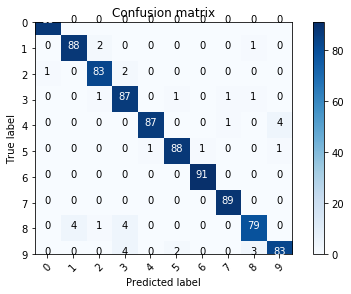

In [29]:
from sklearn import metrics
import itertools

from sklearn.metrics import confusion_matrix

# we predict the classes on the test data
pte = knn.predict(Xte)

# and we calculate the confusion matrix
cm = confusion_matrix(tte, pte)

np.set_printoptions(precision=2)


# code from: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
# now included in sklearn 0.22

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, np.unique(tte))
plt.show()

### 2.1 Digits with knn 
### Question:
As a first shot, we will use the k-NN algorithm to try and model this dataset.
As we did before, use k-fold cross validation to find the best value of $k$. 
<div style="text-align: right"><b>[5 marks]</b></div>

Calculate the confusion matrix for the best parameter, show some examples of the misclassifications and try to explain the remaining errors. 
<div style="text-align: right"><b>[5 marks]</b></div>

In [30]:
from sklearn.model_selection import KFold

def knn_class_digits(folds,draw_graph=True):
    cover1 = []
    cover2 = []
    new_array = np.array(range(1,51))
    
    for k in range(1,51):
        kfg = KFold(n_splits=folds,shuffle=True,random_state=0)
        train_sum = 0
        validation_sum = 0
        for train,validation in kfg.split(Xtr):
            class_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
            class_knn.fit(Xtr[train],ttr[train])
            scores1 = class_knn.score(Xtr[train], ttr[train])
            scores2 = class_knn.score(Xtr[validation], ttr[validation])

            train_sum+=scores1
            validation_sum+=scores2

        cv_scores1 = train_sum/folds
        cv_scores2 = validation_sum/folds
        cover1.append(1-cv_scores1)
        cover2.append(1-cv_scores2)


    best_k_index = cover2.index(min(cover2))
    best_k = new_array[best_k_index]

    if draw_graph:
        plt.plot(new_array,cover1,"r.-",label='Training data')
        plt.plot(new_array,cover2,"g.-",label='Validation data')

        plt.legend(loc='lower right')
        plt.xlabel('Number of Neighbors K')
        plt.ylabel('Misclassified samples')


    return best_k


Performance: 
	- The best value of k is 3  
	- there are 10 number of folds.


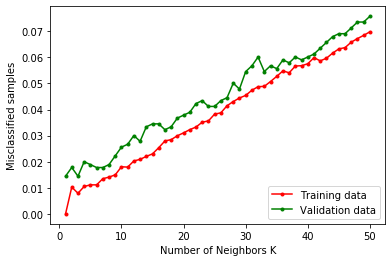

In [31]:
f = 10
best_k = knn_class_digits(f,True)
print('Performance: \n\t- The best value of k is %d  \n\t- there are %d number of folds.' % (best_k,f))
plt.show()

Confusion matrix, without normalization
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  2  2  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


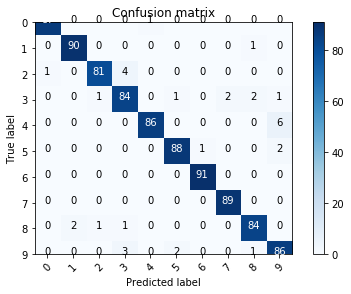

In [32]:
# we predict the classes on the test data
knn3 = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn3.fit(Xtr,ttr)
pte = knn3.predict(Xte)

# and we calculate the confusion matrix
cm = confusion_matrix(tte, pte)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, np.unique(ttr))
plt.show()

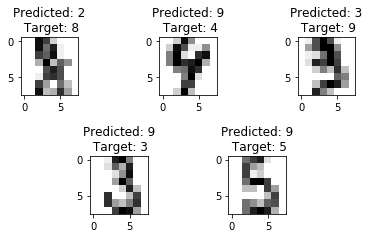

In [33]:
list_1 = []
for j in range(len(tte)):
    target = tte[j]
    predicted = pte[j]
    if target != predicted:
        list_1.append(j)
    
list_2 = list_1[:len(list_1)//3] 
list_2 = list_2[::-1]
for x in range(1,len(list_2)):
    if x % 2 != 0:
        target2 = tte[list_2[x]]
        predicted2 = pte[list_2[x]]
        plt.subplot(2,5,x)
        plt.imshow(np.reshape(Xte[list_2[x]], (8,8)), cmap=plt.cm.gray_r)
        plt.title("Predicted: %d\n Target: %d" % (predicted2,target2))
plt.show()


The confusion matrix and the misclassification examples above has helped to conclude that the most misclassified number paring $(x,y)$ combination are $(9,4), (3,2),(3,9),$ and $(5,8)$ where $x$ is the predicted label and $y$ is the actual label. The example above shows the result of misclassification. There are around 33 combinations of misclassified number paring. This is the least misclassified sample compared to MLP and SVM.

### 2.2 Digits with MLP

### Question:
As a second attempt 
As we did before, use k-fold cross validation to train an MLP on this data, optimising regularisation parameter $\alpha$ and the number of hidden units. 
<div style="text-align: right"><b>[10 marks]</b></div>


In [34]:
from sklearn.neural_network import MLPClassifier
def mlp_digits_classifier(folds,num_of_training,trials,draw_graph=True):
    errors1 = []
    errors2 = []
    alphas =[]
# s
    for g in ((np.logspace(1e-16,1.0,trials)-1)/10):

        kayf = KFold(n_splits=folds,shuffle=True,random_state=0)
        training_sum = 0
        vaild_sum = 0
        Ebest = np.Inf
        alphas.append(g)
        for t,v in kayf.split(Xtr):
            for n in range(num_of_training): # because initialisation is random, we train 10 times and take the best model (according to *training* error)
                mlp = MLPClassifier(solver='lbfgs', alpha=g, hidden_layer_sizes=(5,))
                mlp.fit(Xtr[t], ttr[t])
                if mlp.loss_ < Ebest:
                    mlpbest = mlp
                    Ebest = mlp.loss_
            mlp = mlpbest


            s1 = mlp.score(Xtr[t],ttr[t])
            s2 = mlp.score(Xtr[v],ttr[v])

            training_sum+=s1
            vaild_sum+=s2
            

        cvs1 = training_sum/folds
        cvs2 = vaild_sum/folds

        errors1.append(1-cvs1)
        errors2.append(1-cvs2)

    best_alpha_index = min(enumerate(errors2),key=lambda y:y[1])[0]
    best_alpha = alphas[best_alpha_index]
    
    
    return errors1,errors2,alphas,t,v,mlp,best_alpha

Performance: 
	- The best value of alpha value for the validation data is 0.674264 
	- there are 10 number of training.


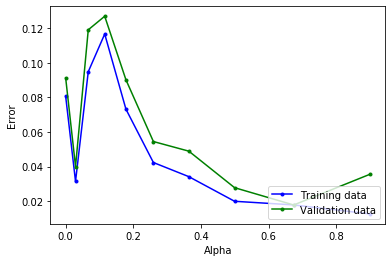

In [35]:
folds = 10
num_of_training = 10
trials = 10


result1,result2,alphas,train,valid,mlp2,best_alpha = mlp_digits_classifier(folds,num_of_training,trials,True)

print('Performance: \n\t- The best value of alpha value for the validation data is %f \n\t- there are %d number of training.' % (best_alpha,num_of_training))

plt.plot(alphas,result1,"b.-",label='Training data')
plt.plot(alphas,result2,"g.-",label='Validation data')
plt.legend(loc='lower right')
plt.xlabel('Alpha')
plt.ylabel('Error')

plt.show()

### Question:

Calculate the confusion matrix for the best parameter, show some examples of the misclassifications and try to explain the remaining errors. 
<div style="text-align: right"><b>[5 marks]</b></div>

Confusion matrix, without normalization
[[82  0  0  0  1  3  2  0  0  0]
 [ 1 71  4  0  3  1  1  4  2  4]
 [ 0  0 82  4  0  0  0  0  0  0]
 [ 0  1  4 71  0  4  0  6  1  4]
 [ 0  3  0  0 88  0  0  0  0  1]
 [ 1  0  0  1  6 78  2  1  0  2]
 [ 0  1  0  0  6  0 83  0  1  0]
 [ 0  2  0  1  0  7  0 75  0  4]
 [ 1  5  3  0  0  0  0  1 68 10]
 [ 4  1  0  3  1  4  0  8  3 68]]


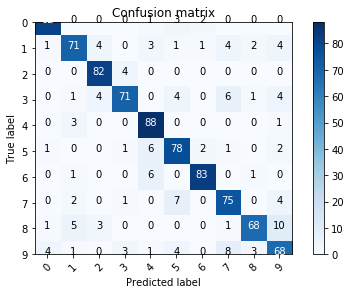

In [36]:
# we predict the classes on the test data

pte = mlp2.predict(Xte)
# and we calculate the confusion matrix
cm = confusion_matrix(tte, pte)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, np.unique(ttr))
plt.show()

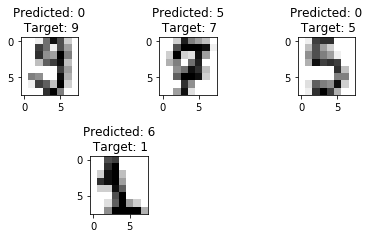

In [53]:
list_1 = []
for j in range(len(tte)):
    target = tte[j]
    predicted = pte[j]
    if target != predicted:
        list_1.append(j)
   
list_2 = list_1[:len(list_1)//16]
for x in range(1,len(list_2)):
    if x % 2 != 0:
        target2 = tte[list_2[x]]
        predicted2 = pte[list_2[x]]
        plt.subplot(2,5,x)
        plt.imshow(np.reshape(Xte[list_2[x]], (8,8)), cmap=plt.cm.gray_r)
        plt.title("Predicted: %d\n Target: %d" % (predicted2,target2))
plt.show()

The confusion matrix and the misclassification examples above has helped to conclude that the most misclassified number paring $(x,y)$ combination are $(0,4), (3,9),(3,8),(5,8)$,and$ (8,3)$ where $x$ is the predicted label and $y$ is the actual label. The example above shows the result of misclassification. There are around 139 combinations of misclassified number paring. This is the most misclassified sample.

### 2.3 Digits with SVM 
The last exercise in this workshop will be to use the SVM classifier for this data. In standard, SVMs only allow for binary classification. The standard approach to use them on multiclass problem is to decompose the problem in N 1 vs all classification problem: ie, in this case, this would mean learning one SVM for classifying digit 0 against all other (eg, [1,2,3,4,5,6,7,8,9]), a second classifier for classifying digit 1 against all others, etc. 
The final classification is given by the classifier that yields the strongest confidence. 

This is not too hard to implement, but luckily sklearn implements 1 vs all as standard in the SVC classes. 

### Question:
Train linear an non linear SVMs, using k-fold cross validation to find the best value for $C$ and $\gamma$. 
<div style="text-align: right"><b>[10 marks]</b></div>

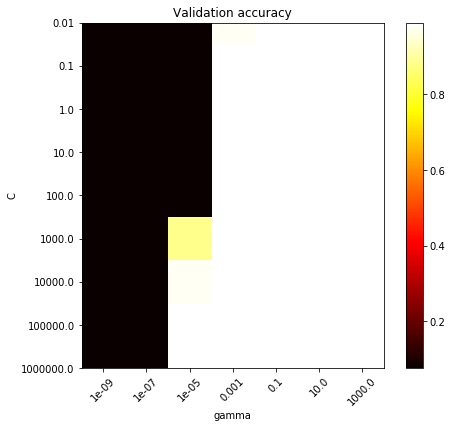

In [56]:
from sklearn.svm import SVC
C_range = np.logspace(-2, 6, 9)
gamma_range = np.logspace(-9,3 , 7)

trials = 5
output1 = []
output2 = []
folds = 5
# classifiers = [] 
for C in C_range:
    for gamma in gamma_range:
        kf_svm = KFold(n_splits=folds,shuffle=True,random_state=1)
        
        svm_train_sum = 0
        svm_validation_sum = 0
        for training,validation2 in kf_svm.split(Xtr):
            svm = SVC(kernel='poly', C=C, gamma=gamma, probability=True)            # SVM with a poly kernel
            svm.fit(Xtr[training], ttr[training])
           
            
            scores_svm1 = svm.score(Xtr[training], ttr[training])
            scores_svm2 = svm.score(Xtr[validation2], ttr[validation2])

            svm_train_sum+=scores_svm1
            svm_validation_sum+=scores_svm2

        cv_svm_scores1 = svm_train_sum/folds
        cv_svm_scores2 = svm_validation_sum/folds

        output1.append(cv_svm_scores1)
        output2.append(cv_svm_scores2)

new_one = np.reshape(output2,(len(C_range),len(gamma_range)))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(new_one, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show() 

In [57]:
best_score = max(enumerate(output2),key=lambda y:y[1])[1]
result_x = np.where(new_one == np.amax(new_one))[0][0]
result_y = np.where(new_one == np.amax(new_one))[1][0]

print("The best parameters are {C:%f, Gamma:%f} with a score of %0.3f"
      % ( C_range[result_x],gamma_range[result_y],best_score))

The best parameters are {C:0.100000, Gamma:0.001000} with a score of 0.990


### Question:
Calculate the confusion matrix for the best parameter, show some examples of the misclassifications and try to explain the remaining errors. 
<div style="text-align: right"><b>[5 marks]</b></div>

Confusion matrix, without normalization
[[86  0  0  0  1  0  1  0  0  0]
 [ 0 83  0  0  0  0  0  0  1  7]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 80  0  3  0  2  6  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  1  0 89  1  0  0  0]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  2  0 86  1  0]
 [ 0  1  0  1  0  1  0  1 83  1]
 [ 0  0  0  1  0  1  0  2  1 87]]


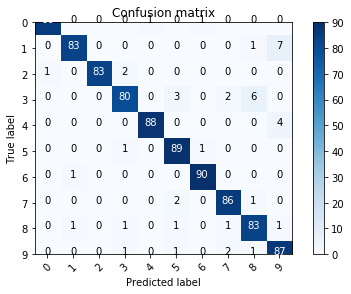

In [58]:
pte = svm.predict(Xte)

# calculate the confusion matrix
cm = confusion_matrix(tte, pte)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, np.unique(ttr))
plt.show()

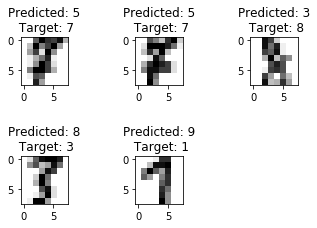

In [59]:
list_1 = []
for j in range(len(tte)):
    target = tte[j]
    predicted = pte[j]
    if target != predicted:
        list_1.append(j)

list_2 = list_1[:len(list_1)//4]
for x in range(1,len(list_2)):
    if x % 2 != 0:
        target2 = tte[list_2[x]]
        predicted2 = pte[list_2[x]]
        plt.subplot(2,6,x)
        plt.imshow(np.reshape(Xte[list_2[x]], (8,8)), cmap=plt.cm.gray_r)
        plt.title("Predicted: %d\n Target: %d" % (predicted2,target2))
plt.show()

The confusion matrix and the misclassification examples above has helped to conclude that the most misclassified number paring $(x,y)$ combination are $(9,1),(8,3),(9,4),$ and $(5,3)$ where $x$ is the predicted label and $y$ is the actual label. The example above shows the result of misclassification. There are around 44 combinations of misclassified number paring. This is the second most misclassified sample after MLP.

### Question:
Compare performance of all 3 algorithms for this problem. Discuss the differences in the remaining errors and what would be your suggestion going forward with this dataset. 
<div style="text-align: right"><b>[10 marks]</b></div>

### Answer:
In relation to speed the fastest is k-NN classifiers which is expected because compared to other classification methods it is fast at training data and slow to classify. SVM generated an accurate validation accuracy after training the data at the cost of computational time. The classifier performance (least to greatest error) is ranked as follows: SVM,MLP and k-NN classifiers. MLP performs well with a good range of $\alpha$ (regularisation constant), better than k-NN classifiers.Non-linear SVM provides an outstanding decision boundary with the best $C$ and $\alpha$. This is because the kernel  trick is carried out by the kernel in order to transform datasets (like executing complex data transformation) based on the labels and/or outputs predefined. This makes for an easy way to locate the optimal boundary between the probable output. There are different kernels ; *'linear', 'poly', 'rbf', 'sigmoid'*, where 
* *'linear'* - Linear SVM algorithm
* *'poly'* - Polynomial SVM algorithm
* *'rbf'* - Gaussian SVM algorithm
* *'sigmoid'* - Sigmoid SVM algorithm

The default kernel for non-linear classification is “rbf”. 

##### Difference in remaining error:
The number of misclassified samples increases from k-NN classifiers -> SVM -> MLP. 


##### Suggestion for further use of this dataset:
This data set could be used on other methods of classification like the decision trees, random forest, Naïve Bayes classification techniques for discrimination,etc to find out the overal best performing method for digits like datasets. Another use for this dataset set could be for comparing and classifying new handwritten numbers generated by humans (different people have different ways of expressing a number). It can also be used for ranking (rank each digit based on the number of features), clustering (Where the groups are not known (i.e the true value is not known) as well as what separates each digit),regression.
